In [23]:
import pandas as pd
import os
from pathlib import Path

# Set the directory containing CSV files
csv_dir = Path("../data/2025_12_05_175206_goat")

# Get all CSV files in the directory
csv_files = sorted(csv_dir.glob("*.csv"))

print(f"Found {len(csv_files)} CSV files:")
for f in csv_files:
    print(f"  - {f.name}")

# Read all CSV files and combine them
dataframes = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    # Add a column to track which file the data came from
    df['source_file'] = csv_file.name
    dataframes.append(df)
    print(f"Loaded {csv_file.name}: {len(df)} rows")

# Combine all dataframes
combined_df = pd.concat(dataframes, ignore_index=True)

print(f"\nTotal rows in combined dataset: {len(combined_df)}")
print(f"All columns: {list(combined_df.columns)}")



Found 9 CSV files:
  - 175303.csv
  - 175308.csv
  - 175313.csv
  - 175318.csv
  - 175324.csv
  - 175329.csv
  - 175334.csv
  - 175336.csv
  - mocap_raw_175336.csv
Loaded 175303.csv: 161 rows
Loaded 175308.csv: 162 rows
Loaded 175313.csv: 161 rows
Loaded 175318.csv: 162 rows
Loaded 175324.csv: 162 rows
Loaded 175329.csv: 161 rows
Loaded 175334.csv: 162 rows
Loaded 175336.csv: 79 rows
Loaded mocap_raw_175336.csv: 464 rows

Total rows in combined dataset: 1674
All columns: ['Timestamp', 'forward_vel_cmd', 'steering_vel_cmd', 'power_mW', 'current_mA', 'busVoltage_V', 'shuntVoltage_mV', 'energy', 'charge', 'dieTemp', 'Left_Stick_X', 'Left_Stick_Y', 'Right_Stick_X', 'Right_Stick_Y', 'Button_0', 'Button_1', 'Button_2', 'Button_3', 'Button_4', 'Button_5', 'Button_6', 'Button_7', 'Button_8', 'Button_9', 'Button_10', 'Button_11', 'Button_12', 'Button_13', 'Button_14', 'Button_15', 'mocap_velocity', 'mocap_x', 'mocap_y', 'mocap_z', 'mocap_roll', 'mocap_pitch', 'mocap_yaw_raw', 'forward_vel_cmd.1

In [24]:
# Check the ppo_control_active column
print("ppo_control_active value counts:")
print(combined_df['ppo_control_active'].value_counts())
print(f"\nTotal rows: {len(combined_df)}")
print(f"Rows with ppo_control_active = 1: {len(combined_df[combined_df['ppo_control_active'] == 1])}")
print(f"Rows with ppo_control_active = 0: {len(combined_df[combined_df['ppo_control_active'] == 0])}")


ppo_control_active value counts:
ppo_control_active
0.0    1048
Name: count, dtype: int64

Total rows: 1674
Rows with ppo_control_active = 1: 0
Rows with ppo_control_active = 0: 1048


In [25]:
# Filter to keep only rows where ppo_control_active = 1
filtered_df = combined_df#[combined_df['ppo_control_active'] == 1].copy()

print(f"Filtered dataset shape (before column selection): {filtered_df.shape}")
print(f"Rows with ppo_control_active = 1: {len(filtered_df)}")


Filtered dataset shape (before column selection): (1674, 108)
Rows with ppo_control_active = 1: 1674


In [26]:
# Select only the specified columns
columns_to_keep = [
    'Timestamp',
    'mocap_velocity',
    'mocap_x',
    'mocap_y',
    'mocap_z',
    'mocap_roll',
    'mocap_pitch',
    'mocap_yaw_raw',
    'left_wheel_vel',
    'right_wheel_vel',
    'ppo_control_active',
    'heading_error_rad',
    'current_heading_rad',
    'distance_to_target',
    'relative_x',
    'relative_y',
    'target_relative_x',
    'target_relative_y',
    'current_waypoint_idx',
    'source_file'
]

# Select only the specified columns
filtered_df = filtered_df[columns_to_keep]

pd.set_option('display.max_rows', None)  # Show all rows

print(f"Final dataset shape: {filtered_df.shape}")
print(f"Columns: {list(filtered_df.columns)}")
print(f"\nFirst few rows:")
filtered_df.head(700)


Final dataset shape: (1674, 20)
Columns: ['Timestamp', 'mocap_velocity', 'mocap_x', 'mocap_y', 'mocap_z', 'mocap_roll', 'mocap_pitch', 'mocap_yaw_raw', 'left_wheel_vel', 'right_wheel_vel', 'ppo_control_active', 'heading_error_rad', 'current_heading_rad', 'distance_to_target', 'relative_x', 'relative_y', 'target_relative_x', 'target_relative_y', 'current_waypoint_idx', 'source_file']

First few rows:


,Timestamp,mocap_velocity,mocap_x,mocap_y,mocap_z,mocap_roll,mocap_pitch,mocap_yaw_raw,left_wheel_vel,right_wheel_vel,ppo_control_active,heading_error_rad,current_heading_rad,distance_to_target,relative_x,relative_y,target_relative_x,target_relative_y,current_waypoint_idx,source_file
0,2025-12-05 17:52:58.852207,0.0,0.215374,1.202182,0.712465,6.071510,2.090014,4.229806,0.0,0.0,0.0,3.082608,-2.053380,4.432036,-6.556511e-06,4.649162e-06,2.284619,3.797823,0.0,175303.csv
1,2025-12-05 17:52:58.883343,0.0,0.215404,1.202146,0.712491,6.066131,2.096148,4.218404,0.0,0.0,0.0,3.094020,-2.064782,4.432051,2.324581e-05,-3.087521e-05,2.284619,3.797823,0.0,175303.csv
2,2025-12-05 17:52:58.914497,0.0,0.215404,1.202146,0.712491,6.066131,2.096148,4.218404,0.0,0.0,0.0,3.094020,-2.064782,4.432051,2.324581e-05,-3.087521e-05,2.284619,3.797823,0.0,175303.csv
3,2025-12-05 17:52:58.944912,0.0,0.215404,1.202146,0.712491,6.066131,2.096148,4.218404,0.0,0.0,0.0,3.094020,-2.064782,4.432051,2.324581e-05,-3.087521e-05,2.284619,3.797823,0.0,175303.csv
4,2025-12-05 17:52:58.976590,0.0,0.215179,1.202143,0.712584,6.060692,2.088126,4.241343,0.0,0.0,0.0,3.071037,-2.041842,4.432169,-2.023578e-04,-3.385544e-05,2.284619,3.797823,0.0,175303.csv
5,2025-12-05 17:52:59.008027,0.0,0.215179,1.202143,0.712584,6.060692,2.088126,4.241343,0.0,0.0,0.0,3.071037,-2.041842,4.432169,-2.023578e-04,-3.385544e-05,2.284619,3.797823,0.0,175303.csv
6,2025-12-05 17:52:59.038999,0.0,0.215179,1.202143,0.712584,6.060692,2.088126,4.241343,0.0,0.0,0.0,3.071037,-2.041842,4.432169,-2.023578e-04,-3.385544e-05,2.284619,3.797823,0.0,175303.csv
7,2025-12-05 17:52:59.070212,0.0,0.215179,1.202143,0.712584,6.060692,2.088126,4.241343,0.0,0.0,0.0,3.071037,-2.041842,4.432169,-2.023578e-04,-3.385544e-05,2.284619,3.797823,0.0,175303.csv
8,2025-12-05 17:52:59.100940,0.0,0.215212,1.202156,0.712592,6.071186,2.084485,4.239035,0.0,0.0,0.0,3.073351,-2.044151,4.432141,-1.691878e-04,-2.110004e-05,2.284619,3.797823,0.0,175303.csv
9,2025-12-05 17:52:59.131561,0.0,0.215212,1.202156,0.712592,6.071186,2.084485,4.239035,0.0,0.0,0.0,3.073351,-2.044151,4.432141,-1.691878e-04,-2.110004e-05,2.284619,3.797823,0.0,175303.csv


/var/folders/bk/v0l8x84j7s1_wq8fc_slmjbh0000gn/T/ipykernel_59832/395685806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Timestamp'] = pd.to_datetime(filtered_df['Timestamp'])


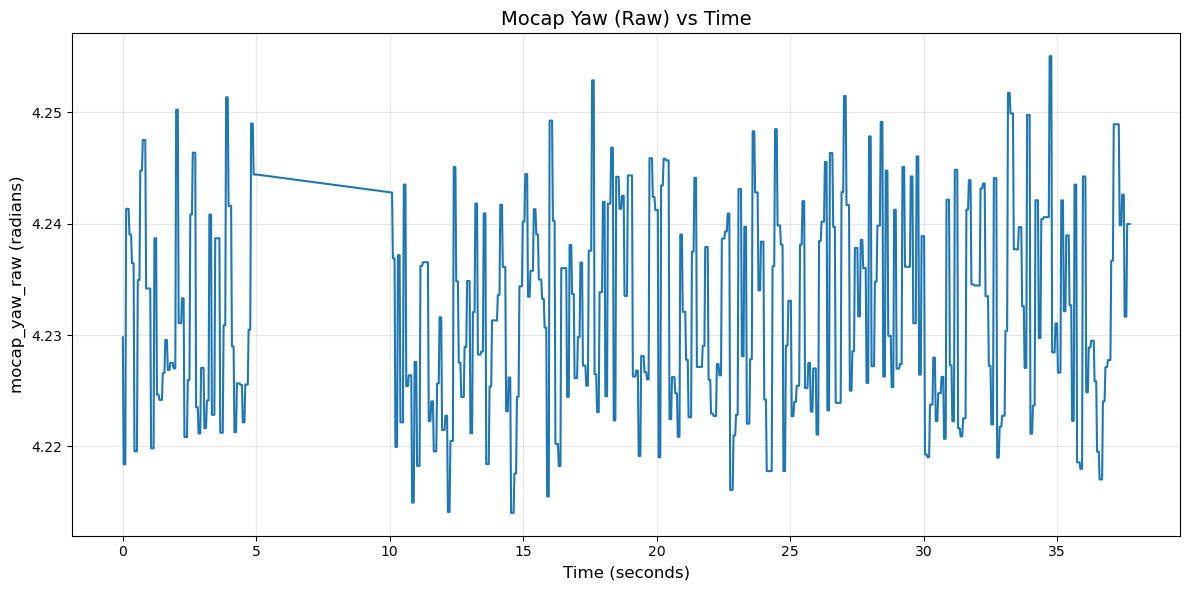

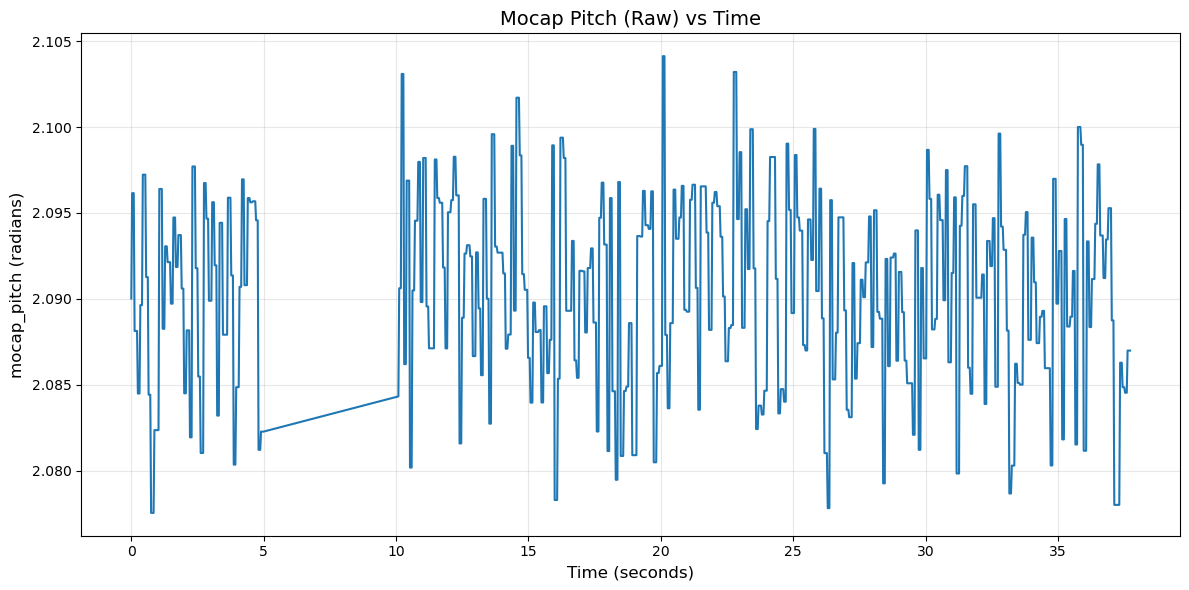

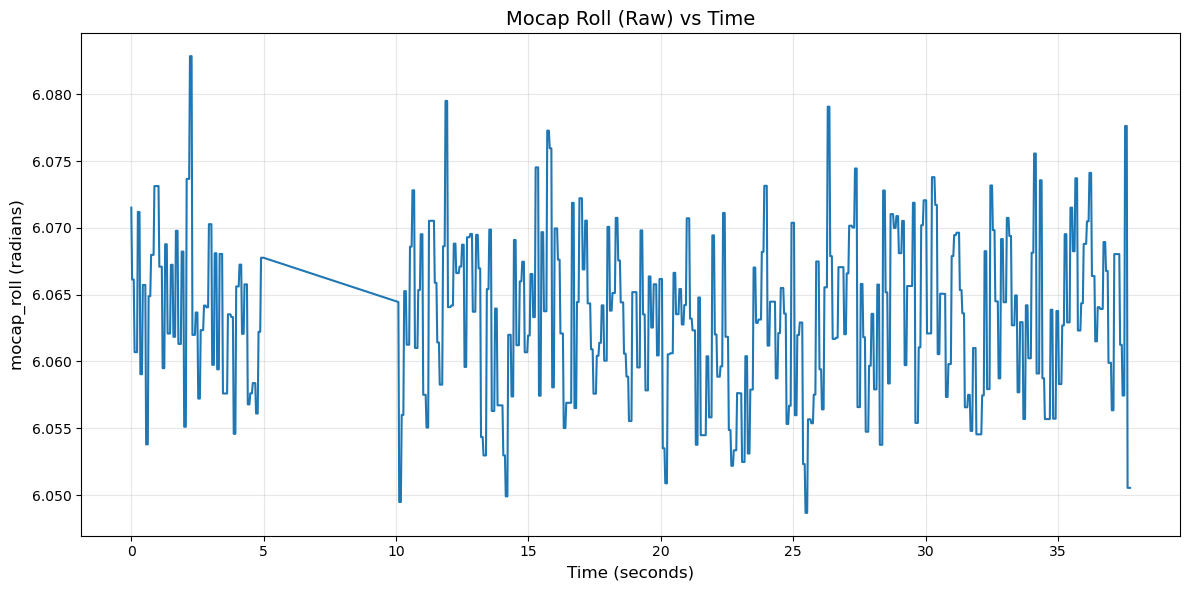

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Convert Timestamp to datetime
filtered_df['Timestamp'] = pd.to_datetime(filtered_df['Timestamp'])

# Sort by timestamp to ensure proper ordering
filtered_df = filtered_df.sort_values('Timestamp').reset_index(drop=True)

# Calculate elapsed time in seconds from the first timestamp
start_time = filtered_df['Timestamp'].iloc[0]
filtered_df['elapsed_time'] = (filtered_df['Timestamp'] - start_time).dt.total_seconds()

# Plot mocap_yaw_raw vs time
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['elapsed_time'], filtered_df['mocap_yaw_raw'], linewidth=1.5)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('mocap_yaw_raw (radians)', fontsize=12)
plt.title('Mocap Yaw (Raw) vs Time', fontsize=14)
plt.grid(True, alpha=0.3)
#plt.ylim(-3.14, 3.14)  # For radians (roughly -π to π)
plt.tight_layout()
plt.show()

# Plot mocap_yaw_raw vs time
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['elapsed_time'], filtered_df['mocap_pitch'], linewidth=1.5)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('mocap_pitch (radians)', fontsize=12)
plt.title('Mocap Pitch (Raw) vs Time', fontsize=14)
plt.grid(True, alpha=0.3)
#plt.ylim(-3.14, 3.14)  # For radians (roughly -π to π)
plt.tight_layout()
plt.show()
# Plot mocap_yaw_raw vs time
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['elapsed_time'], filtered_df['mocap_roll'], linewidth=1.5)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('mocap_roll (radians)', fontsize=12)
plt.title('Mocap Roll (Raw) vs Time', fontsize=14)
plt.grid(True, alpha=0.3)
#plt.ylim(-3.14, 3.14)  # For radians (roughly -π to π)
plt.tight_layout()
plt.show()

